# Diabetes Prediction

## Problem Statment

## Data Gathering

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.dtypes

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Data Check for Outliers

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Glucose

### As per Medical Standard for Blood Glucose:-

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours means you have diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) means you have prediabetes.

In [6]:
df['Glucose'].describe()

count    768.000000
mean     121.117188
std       31.805091
min        0.000000
25%       99.000000
50%      117.000000
75%      142.000000
max      199.000000
Name: Glucose, dtype: float64

### DETECTION:- By,
    1. boxplot, 2. z_score, 3. IQR

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

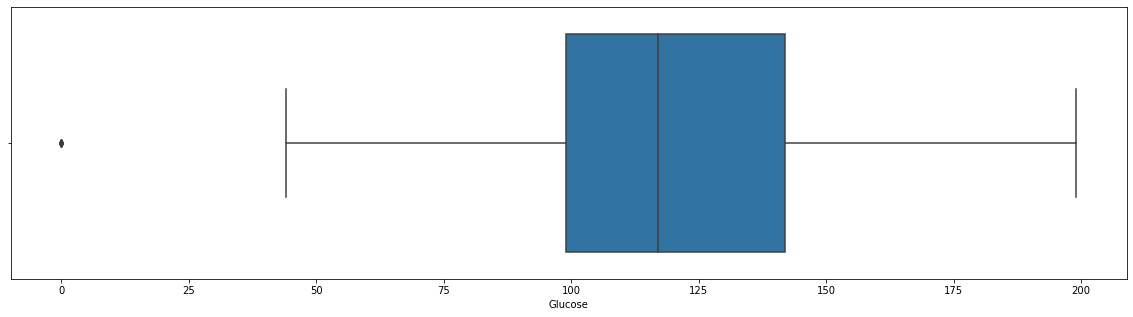

In [7]:
#detect by boxplot

plt.figure(figsize=(20,5))
sns.boxplot(df['Glucose'])

In [8]:
# detect by Z_score method     ...formula, z_score = (value - mean) / std
                               # ... ideal range -3 to +3 (Actually it is depend on Data type)

from scipy.stats import zscore

In [9]:
z_score = np.abs(zscore(df['Glucose']))
z_score

0      0.845787
1      1.136319
2      1.946957
3      0.908711
4      0.908711
         ...   
763    0.632927
764    0.027775
765    0.003687
766    0.153623
767    0.884623
Name: Glucose, Length: 768, dtype: float64

In [10]:
outliers = z_score.loc[z_score > 3]    #suppose we rawly consider more than 3 z_score is outliers
outliers

75     3.810589
182    3.810589
342    3.810589
349    3.810589
502    3.810589
Name: Glucose, dtype: float64

In [11]:
outliers.index

Int64Index([75, 182, 342, 349, 502], dtype='int64')

In [12]:
outliers.value_counts().sum()

5

In [13]:
# Each columnhas 768 number of values, So
# We procced to check outliers by IQR method (Interquartile Range Method),

In [14]:
q1= df['Glucose'].quantile(0.25)
q2= df['Glucose'].quantile(0.50) #median
q3= df['Glucose'].quantile(0.75)

iqr= q3-q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print('q1 :', q1)
print('q2 :', q2)
print('q3 :', q3)
print('iqr :', iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 99.0
q2 : 117.0
q3 : 142.0
iqr : 43.0
upper_tail : 206.5
lower_tail : 34.5


In [15]:
outl = df.loc[(df['Glucose'] < lower_tail) |
                 (df['Glucose'] > upper_tail)]

outl['Glucose']

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

In [16]:
outl.index

Int64Index([75, 182, 342, 349, 502], dtype='int64')

In [17]:
outl['Glucose'].value_counts().sum()

5

## Obseravtions for ['Glucose'] Outliers:
    Boxplot, z-score and IQR all three methods result is exctly same for detect outliers.
    
    1. In boxplot, outliers shown at lower tail side only.
    2. In z_score method, outliers shown with indexing at lower tail side only.
    3. In IQR method, result is exactly same as z_score.

### HANDLE:- By,
    1. Imputation (mean,median, min, max, lr_tail, up_tail, static value), 
    2. Transformation (Log, sqrt, cbrt, reciprocal (1/value), standardization)

In [18]:
#Imputation technique
#for Imputation technique, we calculate imputer (mean, median,...) from without outliers data.
#So, for without outliers data we proceed as below,

without_outliers = df.loc[(df['Glucose'] > lower_tail) &
                 (df['Glucose'] < upper_tail)]

without_outliers['Glucose']

0      148
1       85
2      183
3      150
4      150
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 763, dtype: int64

In [19]:
without_outliers['Glucose'].value_counts().sum()

763

In [20]:
mean = without_outliers['Glucose'].mean()
mean

121.91087811271298

In [21]:
median = without_outliers['Glucose'].median()
median

118.0

In [22]:
minn = without_outliers['Glucose'].min()
minn

44

In [23]:
maxx = without_outliers['Glucose'].max()
maxx

199

In [24]:
df['Glucose'].loc[(df['Glucose'] < lower_tail) |
                 (df['Glucose'] > upper_tail)] = mean

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
df.loc[(df['Glucose'] < lower_tail) |
                 (df['Glucose'] > upper_tail)]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [26]:
without_outliers = df.loc[(df['Glucose'] > lower_tail) &
                 (df['Glucose'] < upper_tail)]

without_outliers['Glucose'].value_counts().sum()

768

In [27]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Now, all 768 values are comes in a norml range, there is no outliers present.

# BloodPressure                             

In [28]:
df['BloodPressure'].describe()

count    768.000000
mean      69.076823
std       19.367794
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

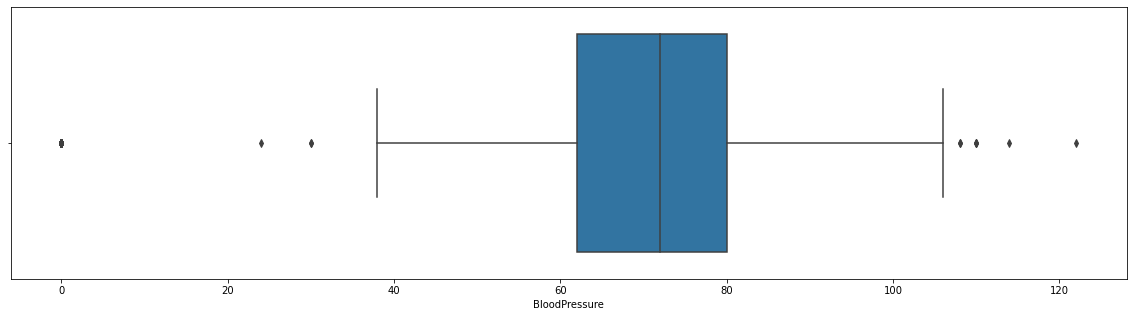

In [29]:
plt.figure(figsize=(20,5))
sns.boxplot(df['BloodPressure'])

In [30]:
#By z_score
z_score = np.abs(zscore(df['BloodPressure']))
z_score

0      0.985618
1      0.158966
2      0.262298
3      0.158966
4      1.502276
         ...   
763    0.357691
764    0.047697
765    0.151028
766    0.468961
767    0.047697
Name: BloodPressure, Length: 768, dtype: float64

In [31]:
outlier_zs= z_score.loc[z_score > 3]
outlier_zs

7      3.568906
15     3.568906
49     3.568906
60     3.568906
78     3.568906
81     3.568906
172    3.568906
193    3.568906
222    3.568906
261    3.568906
266    3.568906
269    3.568906
300    3.568906
332    3.568906
336    3.568906
347    3.568906
357    3.568906
426    3.568906
430    3.568906
435    3.568906
453    3.568906
468    3.568906
484    3.568906
494    3.568906
522    3.568906
533    3.568906
535    3.568906
589    3.568906
601    3.568906
604    3.568906
619    3.568906
643    3.568906
697    3.568906
703    3.568906
706    3.568906
Name: BloodPressure, dtype: float64

In [32]:
outlier_zs.index

Int64Index([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
            332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
            535, 589, 601, 604, 619, 643, 697, 703, 706],
           dtype='int64')

In [33]:
outlier_zs.value_counts().sum()

35

In [34]:
#By IQR

q1= df['BloodPressure'].quantile(0.25)
q2= df['BloodPressure'].quantile(0.50)
q3= df['BloodPressure'].quantile(0.75)

iqr = q3-q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print('q1 :', q1)
print('q2 :', q2)
print('q3 :', q3)
print('iqr :', iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 62.0
q2 : 72.0
q3 : 80.0
iqr : 18.0
upper_tail : 107.0
lower_tail : 35.0


In [35]:
outlier_iqr = df.loc[(df['BloodPressure'] < lower_tail) |
                    (df['BloodPressure'] > upper_tail)]

outlier_iqr['BloodPressure']

7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
601      0
604      0
619      0
643      0
691    114
697      0
703      0
706      0
Name: BloodPressure, dtype: int64

In [36]:
outlier_iqr['BloodPressure'].value_counts().sum()

45

In [37]:
without_out = df.loc[(df['BloodPressure'] > lower_tail) &
                    (df['BloodPressure'] < upper_tail)]
without_out['BloodPressure']

0      50
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 723, dtype: int64

In [38]:
mean = without_out['BloodPressure'].mean()
mean

72.17842323651452

In [39]:
median = without_out['BloodPressure'].median()
median

72.0

In [40]:
upper_tail

107.0

In [41]:
lower_tail

35.0

In [42]:
maxx = without_out['BloodPressure'].max()
maxx

106

In [43]:
minn = without_out['BloodPressure'].min()
minn

38

In [44]:
#Impute putliers by mean

In [45]:
df['BloodPressure'].loc[(df['BloodPressure'] < lower_tail) |
                    (df['BloodPressure'] > upper_tail)] = mean

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
df['BloodPressure'].loc[(df['BloodPressure'] < lower_tail) |
                    (df['BloodPressure'] > upper_tail)].value_counts().sum()

0

In [47]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# SkinThickness                 

In [48]:
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

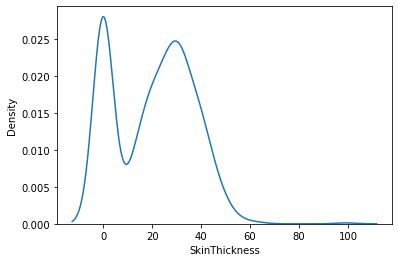

In [49]:
sns.kdeplot(df['SkinThickness'])

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

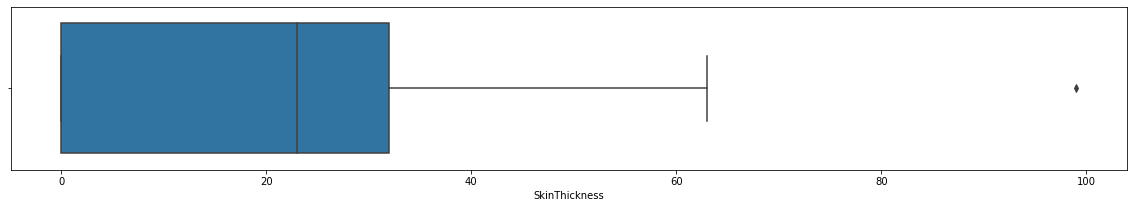

In [50]:
plt.figure(figsize= (20,3))
sns.boxplot(df['SkinThickness'])

In [51]:
z_score_st = np.abs(zscore(df['SkinThickness']))
z_score_st

0      0.907270
1      0.530902
2      1.288212
3      0.154533
4      0.907270
         ...   
763    1.722735
764    0.405445
765    0.154533
766    1.288212
767    0.656358
Name: SkinThickness, Length: 768, dtype: float64

In [52]:
outliers_st= z_score_st.loc[z_score_st > 3]
outliers_st

579    4.921866
Name: SkinThickness, dtype: float64

In [53]:
outliers_st.index

Int64Index([579], dtype='int64')

In [54]:
outliers_st.value_counts().sum()

1

In [55]:
q1 = df['SkinThickness'].quantile(0.25)
q2 = df['SkinThickness'].quantile(0.50)
q3 = df['SkinThickness'].quantile(0.75)

iqr= q3-q1

upper_tail= q3 + 1.5*iqr
lower_tail= q1 - 1.5*iqr

print('q1 :', q1)
print('q2 :', q2)
print('q3 :', q3)
print('iqr :', iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.0
q2 : 23.0
q3 : 32.0
iqr : 32.0
upper_tail : 80.0
lower_tail : -48.0


In [56]:
outlier_iqr = df.loc[(df['SkinThickness'] < lower_tail) |
                    (df['SkinThickness'] > upper_tail)]

outlier_iqr['SkinThickness']

579    99
Name: SkinThickness, dtype: int64

In [57]:
without_out= df.loc[(df['SkinThickness'] > lower_tail) &
                    (df['SkinThickness'] < upper_tail)]
without_out['SkinThickness']

0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 767, dtype: int64

In [58]:
mean = without_out['SkinThickness'].mean()
mean

20.434159061277704

In [59]:
 df['SkinThickness'].loc[(df['SkinThickness'] < lower_tail) |
                    (df['SkinThickness'] > upper_tail)]= mean

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
 df['SkinThickness'].loc[(df['SkinThickness'] < lower_tail) |
                    (df['SkinThickness'] > upper_tail)].value_counts().sum()

0

In [61]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Insulin                       

In [62]:
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

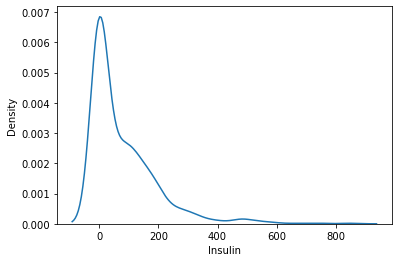

In [63]:
sns.kdeplot(df['Insulin'])

In [64]:
# pd.skew(df['Insulin'])

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

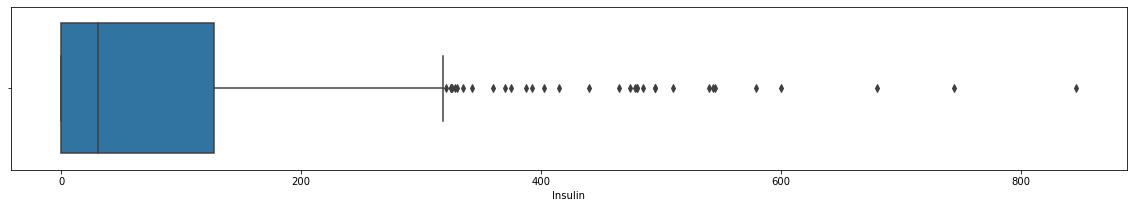

In [65]:
plt.figure(figsize= (20,3))
sns.boxplot(df['Insulin'])

In [66]:
# Outliers check by z_score method

zscore_ins= np.abs(zscore(df['Insulin']))
zscore_ins

0      0.692891
1      0.692891
2      0.692891
3      0.123302
4      0.765836
         ...   
763    0.870031
764    0.692891
765    0.279594
766    0.692891
767    0.692891
Name: Insulin, Length: 768, dtype: float64

In [67]:
outliers_zs = zscore_ins.loc[(zscore_ins > 3)]
outliers_zs

8      4.021922
13     6.652839
111    3.605143
153    3.518314
186    3.605143
220    3.457534
228    5.767184
247    5.211479
286    4.039288
370    3.344656
409    4.334506
415    3.422802
486    3.474899
584    4.516847
645    3.127584
655    3.995873
695    3.474899
753    3.735386
Name: Insulin, dtype: float64

In [68]:
outliers_zs.index


Int64Index([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
            584, 645, 655, 695, 753],
           dtype='int64')

In [69]:
outliers_zs.value_counts().sum()

18

In [70]:
# Outliers check by IQR

In [71]:
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.50)
q3 = df['Insulin'].quantile(0.75)

iqr = q3 - q1

upper_tail= q3 + 1.5*iqr
lower_tail= q1 - 1.5*iqr

print('q1 :', q1)
print('q2 :', q2)
print('q3 :', q3)
print('iqr :', iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.0
q2 : 30.5
q3 : 127.25
iqr : 127.25
upper_tail : 318.125
lower_tail : -190.875


In [72]:
outlier_iqr = df.loc[(df['Insulin'] < lower_tail) |
                    (df['Insulin'] > upper_tail)]

outlier_iqr['Insulin']

8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64

In [73]:
outlier_iqr['Insulin'].index

Int64Index([  8,  13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258,
            286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584,
            612, 645, 655, 695, 707, 710, 715, 753],
           dtype='int64')

In [74]:
outlier_iqr['Insulin'].value_counts().sum()

34

In [75]:
#Handling Outliers

without_outliers = df.loc[(df['Insulin']> lower_tail) &
                         (df['Insulin'] < upper_tail)]

without_outliers['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 734, dtype: int64

In [76]:
without_outliers['Insulin'].value_counts().sum()

734

In [77]:
mean = without_outliers['Insulin'].mean()
mean

62.328337874659404

In [78]:
median = without_outliers['Insulin'].median()
median

0.0

In [79]:
lower_tail

-190.875

In [80]:
upper_tail

318.125

In [81]:
# we are Impute ''MEAN'' for Outliers

df['Insulin'].loc[(df['Insulin'] < lower_tail) |
                    (df['Insulin'] > upper_tail)]= mean

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [82]:
df['Insulin'].loc[(df['Insulin'] < lower_tail) |
                    (df['Insulin'] > upper_tail)].value_counts().sum()

0

In [83]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# BMI                         

In [84]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI', ylabel='Density'>

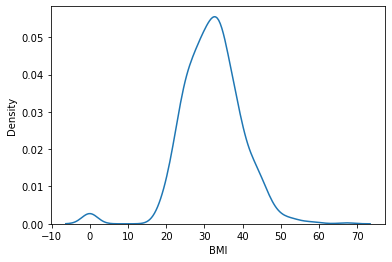

In [85]:
sns.kdeplot(df['BMI'])

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

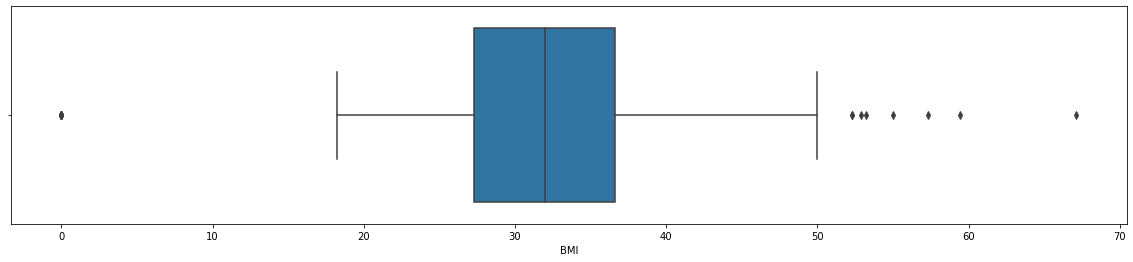

In [86]:
plt.figure(figsize=(20,4))
sns.boxplot(df['BMI'])

In [87]:
# Detection by z_score

z_score_BMI = np.abs(zscore(df['BMI']))
z_score_BMI

0      0.204013
1      0.684422
2      1.103255
3      0.494043
4      1.409746
         ...   
763    0.115169
764    0.610154
765    0.735190
766    0.240205
767    0.202129
Name: BMI, Length: 768, dtype: float64

In [88]:
outliers_zs= z_score_BMI.loc[(z_score_BMI > 2)]
outliers_zs

9      4.060474
49     4.060474
60     4.060474
81     4.060474
84     2.133185
99     2.247413
120    2.691630
125    2.920085
145    4.060474
154    2.018958
155    2.285488
177    4.455807
193    2.577403
247    2.577403
303    2.653554
335    2.018958
371    4.060474
378    2.069726
426    4.060474
445    3.478529
494    4.060474
522    4.060474
673    3.211999
681    2.234721
684    4.060474
706    4.060474
746    2.196645
Name: BMI, dtype: float64

In [89]:
outliers_zs.index

Int64Index([  9,  49,  60,  81,  84,  99, 120, 125, 145, 154, 155, 177, 193,
            247, 303, 335, 371, 378, 426, 445, 494, 522, 673, 681, 684, 706,
            746],
           dtype='int64')

In [90]:
outliers_zs.value_counts().sum()

27

In [91]:
# by IQR method,
q1= df['BMI'].quantile(0.25)
q2= df['BMI'].quantile(0.50)
q3= df['BMI'].quantile(0.75)

iqr = q3 - q1

upper_tail= q3 + 1.5*iqr
lower_tail= q1 - 1.5*iqr

print('q1 :', q1)
print('q2 :', q2)
print('q3 :', q3)
print('iqr :', iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 27.3
q2 : 32.0
q3 : 36.6
iqr : 9.3
upper_tail : 50.550000000000004
lower_tail : 13.35


In [92]:
outliers_iqr = df.loc[(df['BMI'] < lower_tail) |
                     (df['BMI'] > upper_tail)]

outliers_iqr['BMI']

9       0.0
49      0.0
60      0.0
81      0.0
120    53.2
125    55.0
145     0.0
177    67.1
193    52.3
247    52.3
303    52.9
371     0.0
426     0.0
445    59.4
494     0.0
522     0.0
673    57.3
684     0.0
706     0.0
Name: BMI, dtype: float64

In [93]:
outliers_iqr['BMI'].index

Int64Index([  9,  49,  60,  81, 120, 125, 145, 177, 193, 247, 303, 371, 426,
            445, 494, 522, 673, 684, 706],
           dtype='int64')

In [94]:
outliers_iqr['BMI'].value_counts().sum()

19

In [95]:
# Imputation by use IQR,

without_out = df.loc[(df['BMI'] > lower_tail) &
                    (df['BMI'] < upper_tail)]
without_out['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 749, dtype: float64

In [96]:
mean = without_out['BMI'].mean()
mean

32.204005340453925

In [97]:
median = without_out['BMI'].median()
median

32.0

In [98]:
minn = without_out['BMI'].min()
minn

18.2

In [99]:
maxx = without_out['BMI'].max()
maxx

50.0

In [100]:
lower_tail

13.35

In [101]:
upper_tail

50.550000000000004

In [102]:
# we use mean (32.99) imputer for BMI

In [103]:
df['BMI'].loc[(df['BMI'] < lower_tail) |
                     (df['BMI'] > upper_tail)]= mean

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [104]:
df['BMI'].loc[(df['BMI'] < lower_tail) |
                     (df['BMI'] > upper_tail)].value_counts().sum()

0

In [105]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# DiabetesPedigreeFunction    

In [106]:
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

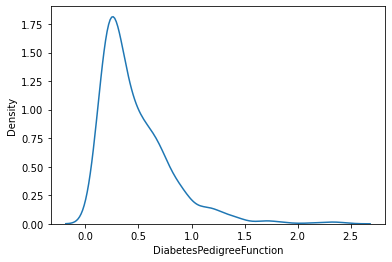

In [107]:
sns.kdeplot(df['DiabetesPedigreeFunction'])

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

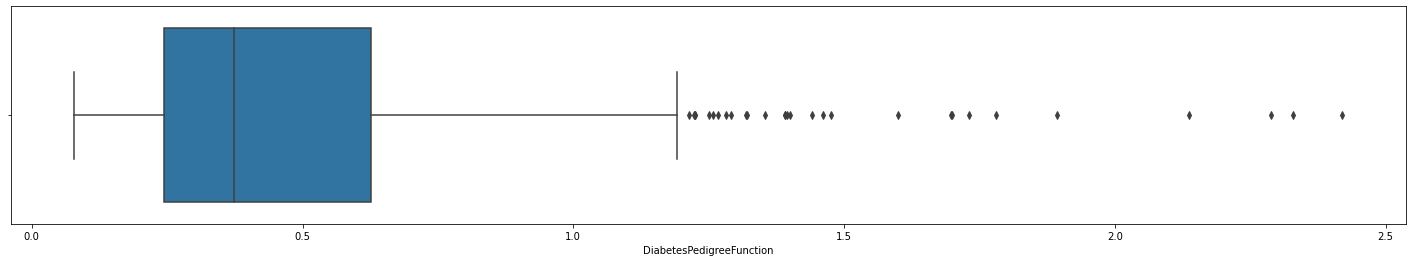

In [108]:
plt.figure(figsize=(25,4))
sns.boxplot(df['DiabetesPedigreeFunction'])

In [109]:
z_score= np.abs(zscore(df['DiabetesPedigreeFunction']))
z_score

0      0.468492
1      0.365061
2      0.604397
3      0.920763
4      5.484909
         ...   
763    0.908682
764    0.398282
765    0.685193
766    0.371101
767    0.473785
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

In [110]:
outliers= z_score.loc[(z_score > 2)]
outliers

4      5.484909
12     2.926869
39     2.772843
45     4.291962
58     3.953709
100    2.265463
147    2.803044
152    2.165799
187    2.564454
218    2.271503
228    5.608734
243    2.555394
245    2.238282
259    2.661098
270    2.005732
292    2.271503
308    2.775863
330    3.032573
370    5.028871
371    3.802703
383    2.404388
395    3.407067
408    2.171839
434    2.011773
445    5.883565
487    2.075195
493    2.029893
534    2.353046
588    2.060095
593    3.706059
606    2.374187
618    2.446670
621    3.703039
622    2.987271
657    2.084255
659    2.476871
661    2.784923
744    2.120497
750    2.144658
Name: DiabetesPedigreeFunction, dtype: float64

In [111]:
outliers.index

Int64Index([  4,  12,  39,  45,  58, 100, 147, 152, 187, 218, 228, 243, 245,
            259, 270, 292, 308, 330, 370, 371, 383, 395, 408, 434, 445, 487,
            493, 534, 588, 593, 606, 618, 621, 622, 657, 659, 661, 744, 750],
           dtype='int64')

In [112]:
outliers.value_counts().sum()

39

In [113]:
#IQR,

q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q2 = df['DiabetesPedigreeFunction'].quantile(0.50)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)

iqr= q3-q1

upper_tail= q3 + 1.5*iqr
lower_tail= q1 - 1.5*iqr

print('q1 :', q1)
print('q2 :', q2)
print('q3 :', q3)
print('iqr :', iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.24375
q2 : 0.3725
q3 : 0.62625
iqr : 0.38249999999999995
upper_tail : 1.2
lower_tail : -0.32999999999999996


In [114]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [115]:
outliers = df.loc[(df['DiabetesPedigreeFunction'] < lower_tail) |
                 (df['DiabetesPedigreeFunction'] > upper_tail)]
outliers['DiabetesPedigreeFunction']

4      2.288
12     1.441
39     1.390
45     1.893
58     1.781
100    1.222
147    1.400
187    1.321
218    1.224
228    2.329
243    1.318
245    1.213
259    1.353
292    1.224
308    1.391
330    1.476
370    2.137
371    1.731
383    1.268
395    1.600
445    2.420
534    1.251
593    1.699
606    1.258
618    1.282
621    1.698
622    1.461
659    1.292
661    1.394
Name: DiabetesPedigreeFunction, dtype: float64

In [116]:
outliers['DiabetesPedigreeFunction'].value_counts().sum()

29

In [117]:
without_ot = df.loc[(df['DiabetesPedigreeFunction'] > lower_tail) &
                   (df['DiabetesPedigreeFunction'] < upper_tail)]

without_ot['DiabetesPedigreeFunction']

0      0.627
1      0.351
2      0.672
3      0.167
5      0.201
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 739, dtype: float64

In [118]:
mean = without_ot['DiabetesPedigreeFunction'].mean()
mean

0.42983220568335573

In [119]:
median = without_ot['DiabetesPedigreeFunction'].median()
median

0.356

In [120]:
df['DiabetesPedigreeFunction'].loc[(df['DiabetesPedigreeFunction'] < lower_tail) |
                 (df['DiabetesPedigreeFunction'] > upper_tail)] = mean

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [121]:
df['DiabetesPedigreeFunction'].loc[(df['DiabetesPedigreeFunction'] < lower_tail) |
                 (df['DiabetesPedigreeFunction'] > upper_tail)].value_counts().sum()

0

# Age   

In [122]:
df['Age'].describe()

count    768.000000
mean      33.243490
std       11.758182
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

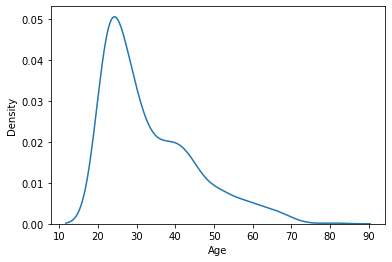

In [123]:
sns.kdeplot(df['Age'])

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

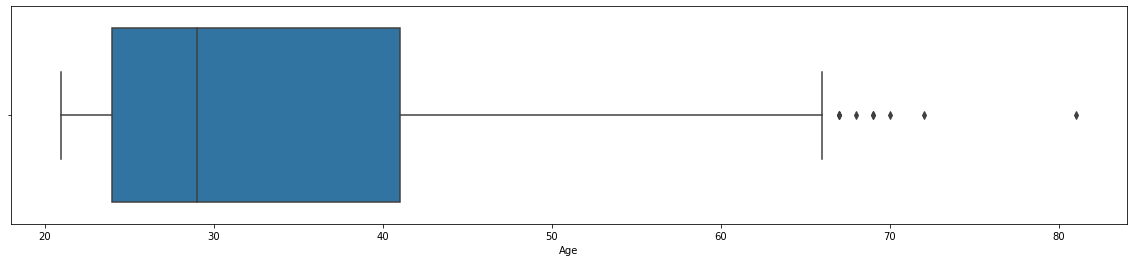

In [124]:
plt.figure(figsize= (20,4))
sns.boxplot(df['Age'])

In [125]:
# ZSOCRE,

z_score= np.abs(zscore(df['Age']))
z_score

0      1.426022
1      0.190927
2      1.596227
3      1.041953
4      0.020722
         ...   
763    2.532356
764    0.531337
765    0.276029
766    1.170715
767    0.871747
Name: Age, Length: 768, dtype: float64

In [126]:
outliers = z_score.loc[(z_score > 2.2)]
outliers

30     2.277048
93     2.277048
115    2.362151
123    3.042971
129    2.447253
148    2.702561
186    2.277048
212    2.277048
221    2.787664
223    2.362151
263    2.532356
294    2.702561
361    2.532356
362    2.702561
363    2.872766
453    3.298279
456    2.447253
459    4.064202
479    2.532356
489    2.872766
495    2.787664
509    2.617459
519    2.277048
537    2.872766
552    2.787664
579    2.447253
582    2.447253
666    3.128074
674    2.957869
684    3.042971
759    2.787664
763    2.532356
Name: Age, dtype: float64

In [127]:
outliers.index

Int64Index([ 30,  93, 115, 123, 129, 148, 186, 212, 221, 223, 263, 294, 361,
            362, 363, 453, 456, 459, 479, 489, 495, 509, 519, 537, 552, 579,
            582, 666, 674, 684, 759, 763],
           dtype='int64')

In [128]:
outliers.value_counts().sum()

32

In [129]:
# IQR,

q1= df['Age'].quantile(0.25)
q2= df['Age'].quantile(0.50)
q3= df['Age'].quantile(0.75)

iqr= q3-q1

upper_tail= q3 + 1.5*iqr
lower_tail= q1 - 1.5*iqr

print('q1 :', q1)
print('q2 :', q2)
print('q3 :', q3)
print('iqr :', iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 24.0
q2 : 29.0
q3 : 41.0
iqr : 17.0
upper_tail : 66.5
lower_tail : -1.5


In [130]:
outliers = df.loc[(df['Age'] < lower_tail) |
                 (df['Age'] > upper_tail)]
outliers['Age']

123    69
363    67
453    72
459    81
489    67
537    67
666    70
674    68
684    69
Name: Age, dtype: int64

In [131]:
outliers['Age'].value_counts().sum()

9

In [132]:
without_ot = df.loc[(df['Age'] > lower_tail) &
                   (df['Age'] < upper_tail)]
without_ot['Age']

0      50
1      31
2      52
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 759, dtype: int64

In [133]:
mean= without_ot['Age'].mean()
mean

32.80764163372859

In [134]:
maxx = without_ot['Age'].max()
maxx

66

In [135]:
df['Age'].loc[(df['Age'] < lower_tail) |
                 (df['Age'] > upper_tail)]= mean

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [136]:
df['Age'].loc[(df['Age'] < lower_tail) |
                 (df['Age'] > upper_tail)].value_counts().sum()

0

In [137]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.910878,72.178423,20.434159,62.328338,32.204005,0.429832,32.807642,0.348958
std,30.254073,11.175382,15.698281,77.358761,6.410480,0.244918,11.045710,0.476951
min,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,100.000000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,118.000000,72.178423,23.000000,30.500000,32.204005,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,110.000000,36.300000,0.582250,40.000000,1.000000
max,199.000000,106.000000,63.000000,318.000000,50.000000,1.191000,66.000000,1.000000


In [138]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

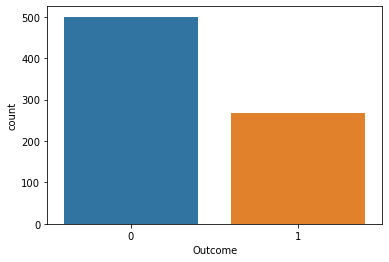

In [139]:
sns.countplot(df['Outcome'])

# Feature Selection

In [140]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.201339,0.053218,0.199794,0.229713,0.076729,0.267601,0.489601
BloodPressure,0.201339,1.000000,0.022405,-0.050531,0.270764,0.020058,0.321997,0.161178
SkinThickness,0.053218,0.022405,1.000000,0.488532,0.373476,0.156550,-0.112254,0.067055
Insulin,0.199794,-0.050531,0.488532,1.000000,0.178098,0.204686,-0.076092,0.086371
BMI,0.229713,0.270764,0.373476,0.178098,1.000000,0.125599,0.072432,0.300738
DiabetesPedigreeFunction,0.076729,0.020058,0.156550,0.204686,0.125599,1.000000,0.043224,0.156548
Age,0.267601,0.321997,-0.112254,-0.076092,0.072432,0.043224,1.000000,0.265338
Outcome,0.489601,0.161178,0.067055,0.086371,0.300738,0.156548,0.265338,1.000000


<AxesSubplot:>

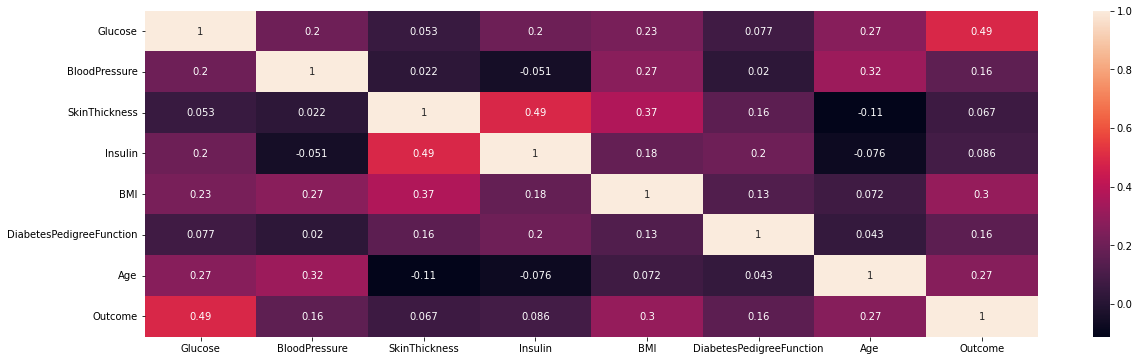

In [141]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), annot=True)

# Model Training

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# LR

In [143]:
LR = LinearRegression()

In [144]:
x= df.drop('Outcome', axis=1)
y= df['Outcome']

In [145]:
x.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,50.0,35.0,0.0,33.6,0.627,50.0
1,85.0,66.0,29.0,0.0,26.6,0.351,31.0


In [146]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state= 15)

In [149]:
x_train.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
548,164.0,82.0,43.0,67.0,32.8,0.341,50.0
161,102.0,74.0,40.0,105.0,37.2,0.204,45.0


In [150]:
x_test.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
343,122.0,86.0,0.0,0.0,34.7,0.290,33.0
728,175.0,88.0,0.0,0.0,22.9,0.326,22.0


In [151]:
LR.fit(x_train, y_train)

LinearRegression()

In [152]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

# Evaluate for Training,

y_pred_train= LR.predict(x_train)

MSE =mse(y_train, y_pred_train)
print('MSE :', MSE)

RMSE= np.sqrt(MSE)
print('RMSE :', RMSE)

MAE = mae(y_train, y_pred_train)
print('MAE :', MAE)

r2= r2_score(y_train, y_pred_train)
print('r2 :', r2)

MSE : 0.15345950361999083
RMSE : 0.3917390759421261
MAE : 0.3227069922329524
r2 : 0.330561037761803


In [153]:
# Evaluate for Testing,

y_pred_test= LR.predict(x_test)

MSE =mse(y_test, y_pred_test)
print('MSE :', MSE)

RMSE= np.sqrt(MSE)
print('RMSE :', RMSE)

MAE = mae(y_test, y_pred_test)
print('MAE :', MAE)

r2= r2_score(y_test, y_pred_test)
print('r2 :', r2)

MSE : 0.17158158732195186
RMSE : 0.41422407863613125
MAE : 0.3347026857350734
r2 : 0.22170744001028253


# LO Reg

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state= 15, stratify=y)

In [155]:
LO =LogisticRegression()

In [156]:
LO.fit(x_train,y_train)

LogisticRegression()

In [157]:
# Evaluation for Training,

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred_train= LO.predict(x_train)

cnf = confusion_matrix(y_train, y_pred_train)
print(cnf)

print('****'*30)

acc = accuracy_score(y_train, y_pred_train)
print(acc)

print('****'*30)

clf_r = classification_report(y_train, y_pred_train)
print(clf_r)

[[330  45]
 [ 81 120]]
************************************************************************************************************************
0.78125
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       375
           1       0.73      0.60      0.66       201

    accuracy                           0.78       576
   macro avg       0.77      0.74      0.75       576
weighted avg       0.78      0.78      0.78       576



In [158]:
# Evaluation for Testing,

y_pred_test= LO.predict(x_test)

cnf = confusion_matrix(y_test, y_pred_test)
print(cnf)

print('****'*30)

acc = accuracy_score(y_test, y_pred_test)
print(acc)

print('****'*30)

clf_r = classification_report(y_test, y_pred_test)
print(clf_r)

[[109  16]
 [ 32  35]]
************************************************************************************************************************
0.75
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       125
           1       0.69      0.52      0.59        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



# KNN classifier

In [159]:
KNN = KNeighborsClassifier()

In [160]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [161]:
# Evaluation for Training,


y_pred_train= KNN.predict(x_train)

cnf = confusion_matrix(y_train, y_pred_train)
print(cnf)

print('****'*30)

acc = accuracy_score(y_train, y_pred_train)
print(acc)

print('****'*30)

clf_r = classification_report(y_train, y_pred_train)
print(clf_r)

[[336  39]
 [ 69 132]]
************************************************************************************************************************
0.8125
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       375
           1       0.77      0.66      0.71       201

    accuracy                           0.81       576
   macro avg       0.80      0.78      0.79       576
weighted avg       0.81      0.81      0.81       576



In [162]:
# Evaluation for Testing,

y_pred_test= KNN.predict(x_test)

cnf = confusion_matrix(y_test, y_pred_test)
print(cnf)

print('****'*30)

acc = accuracy_score(y_test, y_pred_test)
print(acc)

print('****'*30)

clf_r = classification_report(y_test, y_pred_test)
print(clf_r)

[[100  25]
 [ 32  35]]
************************************************************************************************************************
0.703125
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       125
           1       0.58      0.52      0.55        67

    accuracy                           0.70       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.70      0.70      0.70       192



## KNN_Scaling Model

In [163]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### 1. Normalisation

In [164]:
NS = MinMaxScaler()

In [165]:
NS.fit(x_train)

MinMaxScaler()

In [166]:
#For Training Evaluation

transform_train = NS.transform(x_train)
x_train_NS = pd.DataFrame(transform_train, columns= x.columns)
x_train_NS.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.265734,0.484848,0.285714,0.0,0.155556,0.461608,0.777778
1,0.167832,0.393939,0.476190,0.0,0.253968,0.206865,0.444444


In [167]:
KNN_NS = KNeighborsClassifier()
KNN_NS.fit(x_train_NS, y_train)

KNeighborsClassifier()

In [168]:
y_pred_train = KNN_NS.predict(x_train_NS)

cnf = confusion_matrix(y_train, y_pred_train)
print(cnf)

print('****'*30)

acc = accuracy_score(y_train, y_pred_train)
print(acc)

print('****'*30)

clf_r = classification_report(y_train, y_pred_train)
print(clf_r)

[[336  39]
 [ 61 140]]
************************************************************************************************************************
0.8263888888888888
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       375
           1       0.78      0.70      0.74       201

    accuracy                           0.83       576
   macro avg       0.81      0.80      0.80       576
weighted avg       0.82      0.83      0.82       576



In [169]:
#For Testing Data Evaluation

transform_test = NS.transform(x_test)
x_test_NS = pd.DataFrame(transform_test, columns= x.columns)
x_test_NS.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.384615,0.484848,0.444444,0.000000,0.180952,0.291780,0.133333
1,0.580420,0.606061,0.555556,0.516129,0.425397,0.250226,0.088889


In [170]:
y_pred_test = KNN_NS.predict(x_test_NS)

cnf = confusion_matrix(y_test, y_pred_test)
print(cnf)

print('****'*30)

acc = accuracy_score(y_test, y_pred_test)
print(acc)

print('****'*30)

clf_r = classification_report(y_test, y_pred_test)
print(clf_r)

[[94 31]
 [28 39]]
************************************************************************************************************************
0.6927083333333334
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       125
           1       0.56      0.58      0.57        67

    accuracy                           0.69       192
   macro avg       0.66      0.67      0.67       192
weighted avg       0.70      0.69      0.69       192



## 2. Standardization

In [171]:
std = StandardScaler()

In [172]:
std.fit(x_train)

StandardScaler()

In [173]:
#Training Evaluation

transform_train = std.transform(x_train)
x_train_std = pd.DataFrame(transform_train, columns = x.columns)
x_train_std.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.932717,-0.022352,-0.146090,-0.802961,-1.468624,0.632268,2.044856
1,-1.401937,-0.553542,0.616905,-0.802961,-0.975785,-0.493505,0.705507


In [174]:
KNN_std = KNeighborsClassifier()
KNN_std.fit(x_train_std, y_train)

KNeighborsClassifier()

In [175]:
y_pred_train = KNN_std.predict(x_train_std)

cnf = confusion_matrix(y_train, y_pred_train)
print(cnf)

print('****'*30)

acc = accuracy_score(y_train, y_pred_train)
print(acc)

print('****'*30)

clf_r = classification_report(y_train, y_pred_train)
print(clf_r)

[[336  39]
 [ 56 145]]
************************************************************************************************************************
0.8350694444444444
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       375
           1       0.79      0.72      0.75       201

    accuracy                           0.84       576
   macro avg       0.82      0.81      0.81       576
weighted avg       0.83      0.84      0.83       576



In [176]:
#Testing Evaluation

transform_test = std.transform(x_test)
x_test_std = pd.DataFrame(transform_test, columns = x.columns)
x_test_std.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.36295,-0.022352,0.489739,-0.802961,-1.341440,-0.118247,-0.544552
1,0.57549,0.685902,0.934819,1.295805,-0.117291,-0.301884,-0.723132


In [177]:
y_pred_test = KNN_std.predict(x_test_std)

cnf = confusion_matrix(y_test, y_pred_test)
print(cnf)

print('****'*30)

acc = accuracy_score(y_test, y_pred_test)
print(acc)

print('****'*30)

clf_r = classification_report(y_test, y_pred_test)
print(clf_r)

[[97 28]
 [32 35]]
************************************************************************************************************************
0.6875
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       125
           1       0.56      0.52      0.54        67

    accuracy                           0.69       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.69      0.69       192



## KNN_Hyper Parameter Model

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
KNN_hyp = KNeighborsClassifier()

In [180]:
hyp= {'n_neighbors' : np.arange(15,25),
      'p' : [1,2],
      'weights' : ['uniform', 'distance'],
      'metric' : ['euclidean', 'manhattan', 'minkowski']}

gscv_KNN = GridSearchCV(KNN_hyp, hyp, cv=5)
gscv_KNN.fit(x_train, y_train)

gscv_KNN.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=23, p=1,
                     weights='distance')

In [181]:
KNN_hy = gscv_KNN.best_estimator_

In [182]:
# Evaluation for Training,


y_pred_train= KNN_hy.predict(x_train)

cnf = confusion_matrix(y_train, y_pred_train)
print(cnf)

print('****'*30)

acc = accuracy_score(y_train, y_pred_train)
print(acc)

print('****'*30)

clf_r = classification_report(y_train, y_pred_train)
print(clf_r)

[[375   0]
 [  0 201]]
************************************************************************************************************************
1.0
************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       201

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [183]:
# Evaluation for Testing,

y_pred_test= KNN_hy.predict(x_test)

cnf = confusion_matrix(y_test, y_pred_test)
print(cnf)

print('****'*30)

acc = accuracy_score(y_test, y_pred_test)
print(acc)

print('****'*30)

clf_r = classification_report(y_test, y_pred_test)
print(clf_r)

[[106  19]
 [ 31  36]]
************************************************************************************************************************
0.7395833333333334
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       125
           1       0.65      0.54      0.59        67

    accuracy                           0.74       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.73      0.74      0.73       192



# Decision Tree

In [184]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [185]:
# Evaluation for Training,

y_pred_train = DT.predict(x_train)

cnf = confusion_matrix(y_train, y_pred_train)
print(cnf)

print('****'*30)

acc = accuracy_score(y_train, y_pred_train)
print(acc)

print('****'*30)

clf_r = classification_report(y_train, y_pred_train)
print(clf_r)

[[375   0]
 [  0 201]]
************************************************************************************************************************
1.0
************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       201

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [186]:
#Evaluation for Testing,

y_pred_test= DT.predict(x_test)

cnf = confusion_matrix(y_test, y_pred_test)
print(cnf)

print('****'*30)

acc = accuracy_score(y_test, y_pred_test)
print(acc)

print('****'*30)

clf_r = classification_report(y_test, y_pred_test)
print(clf_r)

[[95 30]
 [31 36]]
************************************************************************************************************************
0.6822916666666666
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       125
           1       0.55      0.54      0.54        67

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192



# DT_Hyper

In [187]:
DT_hyper = DecisionTreeClassifier()

In [ ]:
hyp =   {'criterion' : ['mse','mae'],
         'max_depth' : np.arange(3,30),
         'min_samples_split' : np.arange(2,20),
         'min_samples_leaf' : np.arange(2,20)}

gscv_hyp = GridSearchCV(DT_hyper, hyp, cv=5)
gscv_hyp.fit(x_train, y_train)

gscv_hyp.best_estimator_

In [ ]:
model= gscv_hyp.best_estimator_

In [ ]:
# Evaluation for Training,

y_pred_train = model.predict(x_train)

cnf = confusion_matrix(y_train, y_pred_train)
print(cnf)

print('****'*30)

acc = accuracy_score(y_train, y_pred_train)
print(acc)

print('****'*30)

clf_r = classification_report(y_train, y_pred_train)
print(clf_r)

In [ ]:
#Evaluation for Testing,

y_pred_test= model.predict(x_test)

cnf = confusion_matrix(y_test, y_pred_test)
print(cnf)

print('****'*30)

acc = accuracy_score(y_test, y_pred_test)
print(acc)

print('****'*30)

clf_r = classification_report(y_test, y_pred_test)
print(clf_r)

# Comprison of Models,

In [ ]:
Data Accuracy,
           Training     Testing
LR=          0.331       0.222
LO=          0.781       0.75
KNN=         0.813       0.703
KNN_NS=      0.826       0.693
KNN_std=     0.835       0.688
KNN_hyp=     1.0         0.693
DT=          1.0         0.69

#### we Use normal KNN for prediction,

In [189]:
df.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,50.0,35.0,0.0,33.6,0.627,50.0,1
1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0


In [190]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [191]:
Glucose= 148.0
BloodPressure= 50
SkinThickness= 35.0
Insulin=0
BMI=33.6
DiabetesPedigreeFunction=0.627
Age=50

In [192]:
arr = np.array([[Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
arr

array([[148.   ,  50.   ,  35.   ,   0.   ,  33.6  ,   0.627,  50.   ]])

In [193]:
pred = KNN.predict(arr)

if pred[0] ==1:
    print('yes')
if pred[0] ==0:
    print('no')

yes


C:\Users\sai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [195]:
import pickle as pkl

with open('KNN_model.pkl', 'wb') as f:
    pkl.dump(KNN, f)